### Task 1: **Supervised Learning**

### Name: Bharat Raghunathan

**Problem Statement:** Predict the percentage of marks that a student is expected to score based on the number of hours they studied.

**Solution Approach:** This is a regression task since the output variable, **score**, is continuous.

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression
sns.set_style("darkgrid")
%matplotlib inline

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
student = pd.read_csv(url)
student.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Exploratory Data Analysis
Let us try to analyze a sample of our dataset:
1. Explore the distributions of the *feature* and *target* variables
2. Find out whether there is any pattern or relationship between the *feature* and the *target* variable

/Users/bharat.raghunathan/opt/anaconda3/envs/gl/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

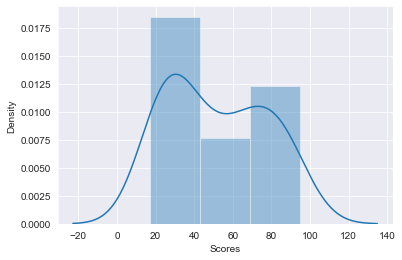

In [3]:
# Plotting the distribution of target variable
sns.distplot(student["Scores"])

/Users/bharat.raghunathan/opt/anaconda3/envs/gl/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

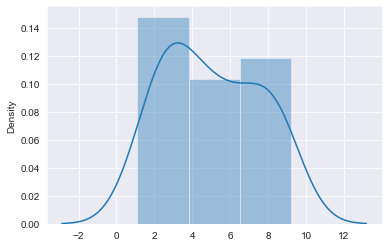

In [4]:
sns.distplot(student.drop("Scores", axis=1))

/Users/bharat.raghunathan/opt/anaconda3/envs/gl/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

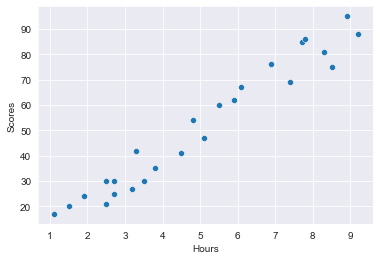

In [5]:
#Since features is a single column here, check for any correlations first 
sns.scatterplot(student["Hours"], student["Scores"])

The above does seem to be **positively correlated** and in fact, maybe a **linear relationship**. Let's try a linear plot.

/Users/bharat.raghunathan/opt/anaconda3/envs/gl/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


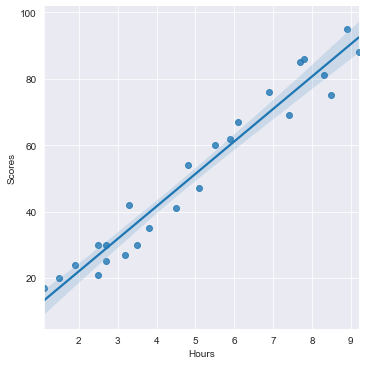

In [6]:
sns.lmplot("Hours", "Scores", data=student)

**From the graph above** (and the narrow 95% confidence band), **we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### Prepare the Data
Separate the given dataset into `features` and `target` variables

In [7]:
# Separate the given dataset into its features and target variables
features = student.drop("Scores", axis=1)
target = student["Scores"]
X = features
y = target

In [8]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=42) 

### **Training the Model**
We have split our data into training and testing sets, and now is finally the time to train our model. 

In [9]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


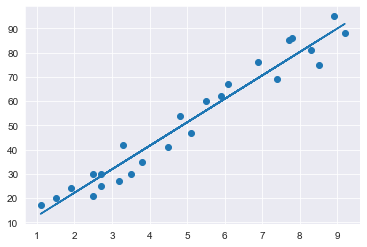

In [10]:
# Plotting the regression line on the entire data
line = regressor.coef_ * X + regressor.intercept_

# Plotting for the entire data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [11]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

    Hours
8     8.3
16    2.5
0     2.5
23    6.9
11    5.9


In [12]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


#### Task Question
What is the expected % of marks for a student who studied for `9.25` hours?

In [13]:
# Testing with sample data.
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.38611528261494


### Interpretation of Model Output
This means that if a student studied for `9.25` hours, they are expected to score `92.38` marks, which seems sensible.

### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. Since this is a regression task, we have chosen:
1. Mean Absolute Error (MAE): $\frac{1}{n}\sum_{i=1}^{n}\lvert{y_i - \hat{y_i}}\rvert$
2. Root Mean Squared Error (RMSE): $\sqrt{\frac{1}{n}\sum_{i=1}^{n}{{(y_i - \hat{y_i})}^2}}$

where n -> Number of data points

In [14]:
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Root Mean Squared Error: {metrics.mean_squared_error(y_test, y_pred, squared=False)}')

Mean Absolute Error: 3.9207511902099244
Root Mean Squared Error: 4.352380006653288
